In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("A:\Dataset\Data.csv")
df

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\astik\AppData\Local\Temp\ipykernel_3540\622091081.py:1: SyntaxWarning: invalid escape sequence '\D'
  df=pd.read_csv("A:\Dataset\Data.csv")


,Country,Age,Salary,Purchased
0,India,44.0,72000.0,No
1,Thailand,27.0,48000.0,Yes
2,Indonesia,30.0,54000.0,No
3,China,38.0,61000.0,No
4,India,40.0,NaN,Yes
5,China,35.0,58000.0,Yes
6,Thailand,NaN,52000.0,No
7,India,48.0,79000.0,Yes
8,Indonesia,50.0,83000.0,No
9,Thailand,37.0,67000.0,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    19 non-null     object 
 1   Age        16 non-null     float64
 2   Salary     16 non-null     float64
 3   Purchased  19 non-null     object 
dtypes: float64(2), object(2)
memory usage: 740.0+ bytes


In [7]:
df.drop(['Country','Purchased'],axis=1,inplace=True)

In [9]:
df

,Age,Salary
0,44.0,72000.0
1,27.0,48000.0
2,30.0,54000.0
3,38.0,61000.0
4,40.0,NaN
5,35.0,58000.0
6,NaN,52000.0
7,48.0,79000.0
8,50.0,83000.0
9,37.0,67000.0


In [11]:
df.isnull().sum()

Age       3
Salary    3
dtype: int64

In [13]:
df['Salary'].fillna(df['Salary'].median(skipna=True),inplace=True)
df.isnull().sum()

C:\Users\astik\AppData\Local\Temp\ipykernel_3540\2561251221.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Salary'].fillna(df['Salary'].median(skipna=True),inplace=True)


Age       3
Salary    0
dtype: int64

In [15]:
df['Age'].fillna(df['Age'].median(skipna=True),inplace=True)

C:\Users\astik\AppData\Local\Temp\ipykernel_3540\1566095671.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(skipna=True),inplace=True)


In [17]:
df.isna().sum()

Age       0
Salary    0
dtype: int64

In [19]:
df

,Age,Salary
0,44.0,72000.0
1,27.0,48000.0
2,30.0,54000.0
3,38.0,61000.0
4,40.0,60500.0
5,35.0,58000.0
6,39.0,52000.0
7,48.0,79000.0
8,50.0,83000.0
9,37.0,67000.0


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X=df.drop('Age',axis=1)
y=df[['Age']]

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=12)

In [25]:
clf=DecisionTreeClassifier(criterion='gini',random_state=12,max_depth=5,min_samples_leaf=6)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=6, random_state=12)

In [27]:
y_pred=clf.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]]
              precision    recall  f1-score   support

        25.0       0.00      0.00      0.00         0
        37.0       0.00      0.00      0.00         1
        39.0       1.00      1.00      1.00         1
        41.0       0.00      0.00      0.00         1
        43.0       0.00      0.00      0.00         1
        48.0       0.00      0.00      0.00         1
        52.0       0.00      0.00      0.00         1

    accuracy                           0.17         6
   macro avg       0.14      0.14      0.14         6
weighted avg       0.17      0.17      0.17         6



C:\Users\astik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\astik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\astik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\astik\anaconda3\Lib\site-packages\sklea

In [31]:
target=list(df['Age'].unique())
feat_name=list(X.columns)

In [33]:
feat_name

['Salary']

In [35]:
target

[44.0,
 27.0,
 30.0,
 38.0,
 40.0,
 35.0,
 39.0,
 48.0,
 50.0,
 37.0,
 25.0,
 36.0,
 42.0,
 52.0,
 41.0,
 29.0,
 43.0]

In [37]:
from sklearn.tree import export_text
txt = export_text(clf, feature_names=feat_name)
print(txt)

|--- Salary <= 59000.00
|   |--- class: 39.0
|--- Salary >  59000.00
|   |--- class: 25.0



<Axes: xlabel='Age', ylabel='Salary'>

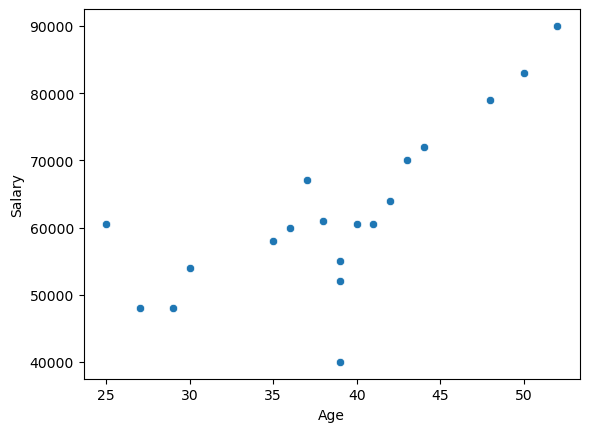

In [39]:
sns.scatterplot(x='Age',y='Salary',data=df)

<Axes: xlabel='Age', ylabel='Salary'>

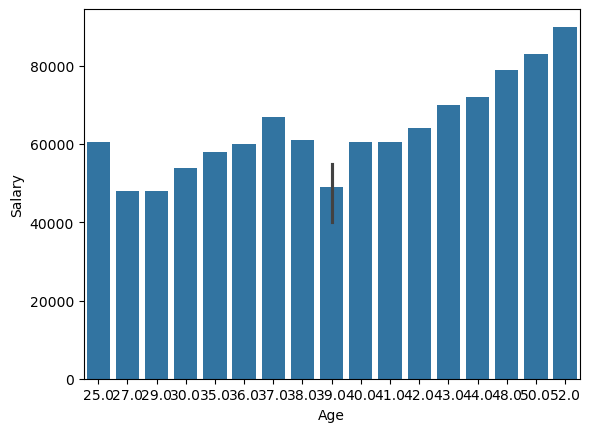

In [41]:
sns.barplot(x='Age',y='Salary',data=df)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X=df.drop('Salary',axis=1)
y=df[['Salary']]

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=89)

In [49]:
clf=DecisionTreeClassifier(criterion='gini',random_state=89,max_depth=5,min_samples_leaf=6)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=6, random_state=89)

In [51]:
y_pred=clf.predict(X_test)

In [53]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]]
              precision    recall  f1-score   support

     40000.0       0.00      0.00      0.00       0.0
     48000.0       0.00      0.00      0.00       0.0
     52000.0       0.00      0.00      0.00       1.0
     60500.0       0.00      0.00      0.00       1.0
     61000.0       0.00      0.00      0.00       1.0
     64000.0       0.00      0.00      0.00       1.0
     67000.0       0.00      0.00      0.00       1.0
     70000.0       0.00      0.00      0.00       1.0

    accuracy                           0.00       6.0
   macro avg       0.00      0.00      0.00       6.0
weighted avg       0.00      0.00      0.00       6.0



C:\Users\astik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\astik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\astik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\astik\anaconda3\Lib\site-packages\sklea

In [55]:
target=list(df['Salary'].unique())
feat_name=list(X.columns)

In [57]:
from sklearn.tree import export_text
expo = export_text(clf, feature_names=feat_name)
print(expo)

|--- Age <= 37.50
|   |--- class: 48000.0
|--- Age >  37.50
|   |--- class: 40000.0



As the age is maximized,the average salary is maximized; As the age is minimized,the average salary is minimized.